In [17]:
import numpy as np
import scipy.signal as sp
import matplotlib.pyplot as plt

#### Функции

In [18]:
# Диаграмма нулей и полюсов
def ZerosPolesDiagram(z, p):
    fg, ax = plt.subplots(figsize=(5, 5))
    circle = plt.Circle(xy=(0,0),radius=1, edgecolor='gray', facecolor='white', linestyle='--')
    ax.add_patch(circle)
    ax.scatter(z.real, z.imag, marker='o', facecolor='white', edgecolor='C0', s=100)
    ax.scatter(p.real, p.imag, marker='x', s=100)
    ax.axhline(y=0, color="black", linestyle="-")
    ax.axvline(x=0, color="black", linestyle="-")
    ax.grid()
    plt.show()

# Расчет АЧХ
def FrequencyResponse(h):
    with np.errstate(divide='ignore'): # suppress RuntimeWarning: divide by zero encountered in log10
        return 20 * np.log10(abs(h))

# Расчет ФЧХ
def PhaseResponse(h):
    return np.unwrap(np.angle(h))

# Графики АЧХ и ФЧХ
def FRPRDiagram(w, fr, pr, **kwargs):
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,5), layout='constrained')

    ax[0].plot(w, fr, 'b')
    ax[0].set_ylabel('Амплитуда, дБ', color='b')
    ax[0].set_xlabel('Частота, рад')
    ax[0].grid(True)

    ax[1].plot(w, pr, 'g')
    ax[1].set_ylabel('Фаза, рад', color='g')
    ax[1].set_xlabel('Частота, рад')
    ax[1].grid(True)

    if 'title' in kwargs.keys():
        fig.suptitle(kwargs['title'])

    if 'ylimits' in kwargs.keys():
        ax[0].set_ylim(kwargs['ylimits'])

    if 'xvlines' in kwargs.keys():
        for xvline in kwargs['xvlines']:
            for axis in ax:
                axis.axvline(x=xvline, color='gray', linestyle='dashed', linewidth=1.5)
    
    plt.show()

#### Исходные данные

In [19]:
# Исходные данные

# Нормированная частота среза (Гц)
Fc = 3500/25000

# Нормированная частота задержания (Гц)
Fz = 4000/25000

# Уровень на частоте среза
Qc = 3

# Уровень на частоте задержания
Qz = 50

# Частота дискретизации (Гц)
Fd = 50000

# Пульсации в полосе пропускания (Дб)
Rp = 0.5

# Пульсации в полосе подавления (Дб)
Rs = 150

# Полоса (для полосового и режекторного фильтров)
dF = [5000/25000, 10000/25000]

### 1.1 Аппроксимация Баттерворта

##### Используемые функции

**Расчет порядка цифрового фильтра Баттерворта**

`buttord(wp, ws, gpass, gstop, analog, fs)`

Возвращает минимальный порядок цифрового фильтра и натуральную частоту Баттерворта

`wp` - частота среза (для фильтров низких или высоких частот) или частоты полосы пропускания (для полосовых фильтров)\
`ws` - частота задержания (для фильтров низких или высоких частот) или частоты полосы подавления (для полосовых фильтров)\
`gpass` - максимально-допустимые потери в полосе пропускания\
`gstop` - минимальное затухание в полосе подавления\
`analog` - ***false*** (по умолчанию) - для цифровых фильтров, ***true*** - для аналоговых фильтров\
`fs` - частота дискретизации цифровой системы


**Синтез цифрового или аналогового фильтра заданного порядка**

Возвращает коэффициенты синтезированного фильтра

`butter(N, Wn, btype, analog, output, fs)`

`N` - порядок фильтра\
`Wn` - критические частоты фильтра\
`btype` - тип фильтра: ***lowpass*** - фильтр низких частот, ***highpass*** - фильтр высоких частот, ***bandpass*** - полосовой фильтр, ***bandstop*** - режекторный фильтр\
`analog` - ***false*** (по умолчанию) - для цифровых фильтров, ***true*** - для аналоговых фильтров\
`output` - тип возвращаемых значений: ***ba*** (по умолчанию), ***zpk***, ***sos***\
`fs` - частота дискретизации цифровой системы

**Вычисление АЧХ и ФЧХ синтезированного цифрового фильтра**

`freqz(b, a, worN, whole, plot, fs, include_nyquist)`

`b` - коэффициенты прямых связей\
`a` - коэффициенты обратных связей\
`worN` - количество вычисляемых точек (по умолчанию - 512)\
`whole` - ***false*** (по умолчанию) - вычисление частот от 0 до частоты Найквиста, ***true*** - вычисление частот от 0 до частоты дискретизации (fs)\
`plot` - функция для отрисовки результата\
`fs` - частота дискретизации цифровой системы\
`include_nyquist` - вычисление результата для наибольшей частоты (частоты Найквиста) (по умолчанию - не вычисляется)


In [20]:
# Расчитаем порядок ЦФ Баттерворта. Для этого воспользуемся функцией buttord:
[n, Fn] = sp.buttord(wp=Fc, ws=Fz, gpass=Qc, gstop=Qz, fs=Fd)
print(f'n = {n}\nWn = {Fn}')

n = 44
Wn = 0.14000755534114231


#### Фильтр низких частот

n = 44
Wn = 0.14000755534114231


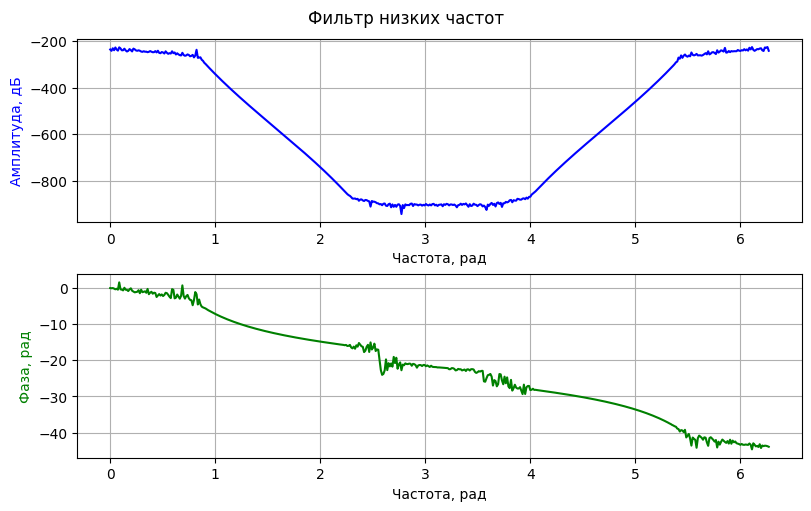

In [21]:
# Нормированная частота среза (Гц)
Fc = 3500/25000

# Нормированная частота задержания (Гц)
Fz = 4000/25000

# Уровень на частоте среза
Qc = 3

# Уровень на частоте задержания
Qz = 50

# Частота дискретизации (Гц)
Fd = 50000

# Расчитаем порядок ЦФ Баттерворта. Для этого воспользуемся функцией buttord:
[n, Fn] = sp.buttord(wp=Fc, ws=Fz, gpass=Qc, gstop=Qz, fs=Fd)
print(f'n = {n}\nWn = {Fn}')

# Синтезируем ЦФ. Для этого воспользуемся функцией butter:
[b, a] = sp.butter(n, Fn, btype="lowpass")

# Для вывода АЧХ и ФЧХ воспользуемся функцией freqz:
# w, h = sp.freqz(b, a, worN=512, fs=Fd)
w, h = sp.freqz(b, a, worN=512, whole=True)

# Расчет АЧХ по откликам фильтра
fr = FrequencyResponse(h=h)

# Расчет ФЧХ по откликам фильтра
pr = PhaseResponse(h=h)

# Графики АЧХ и ФЧХ
FRPRDiagram(w=w, fr=fr, pr=pr, title='Фильтр низких частот')
# FRPRDiagram(w=w, fr=fr, pr=pr, title='Фильтр низких частот', xvlines=[5000, 10000])

# printfilter(title='Фильтр низких частот', w=w, h=h, xvlines=[5000, 10000])


Нули: []
Полюса: [1.62226265+0.47881345j 1.62226265-0.47881345j 1.69736927+0.21797263j
 1.69736927-0.21797263j 1.68104628+0.j         1.46365056+0.68628488j
 1.46365056-0.68628488j 1.26572717+0.81793379j 1.26572717-0.81793379j
 1.06126437+0.8738012j  1.06126437-0.8738012j  0.87413946+0.86415473j
 0.87413946-0.86415473j 0.71280631+0.80625984j 0.71280631-0.80625984j
 0.74080709+0.69264927j 0.74080709-0.69264927j 0.58038916+0.73671017j
 0.58038916-0.73671017j 0.91224479+0.23221526j 0.91224479-0.23221526j
 0.48890959+0.65945856j 0.48890959-0.65945856j 0.42510306+0.57789663j
 0.42510306-0.57789663j 0.38157062+0.49704075j 0.38157062-0.49704075j
 0.35377744+0.41951475j 0.35377744-0.41951475j 0.33850366+0.3467767j
 0.33850366-0.3467767j  0.33213264+0.27871373j 0.33213264-0.27871373j
 0.38304112+0.24406888j 0.38304112-0.24406888j 0.32248603+0.21683085j
 0.32248603-0.21683085j 0.30843006+0.16361453j 0.30843006-0.16361453j
 0.29735953+0.10937288j 0.29735953-0.10937288j 0.29129925+0.05454756j
 0.2

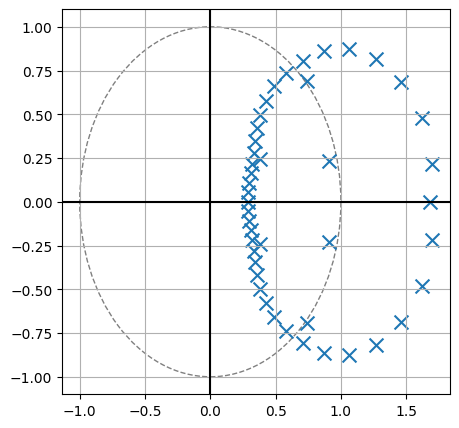

In [22]:
# Возвращаемые значения:
# z - значения нулей фильтра
# p - значения полюсов фильтра
# k - коэффициент усиления фильтра
# Параметры:
# b - коэффициенты прямых связей
# a - коэффициенты обратных связей
z, p, k = sp.tf2zpk(b=b, a=a)

print(f'Нули: {z}')
print(f'Полюса: {p}')
print(f'Коэффициент усиления: {k}')

ZerosPolesDiagram(z=z, p=p)

n = 44
Wn = 0.14000755534114231
len = 22


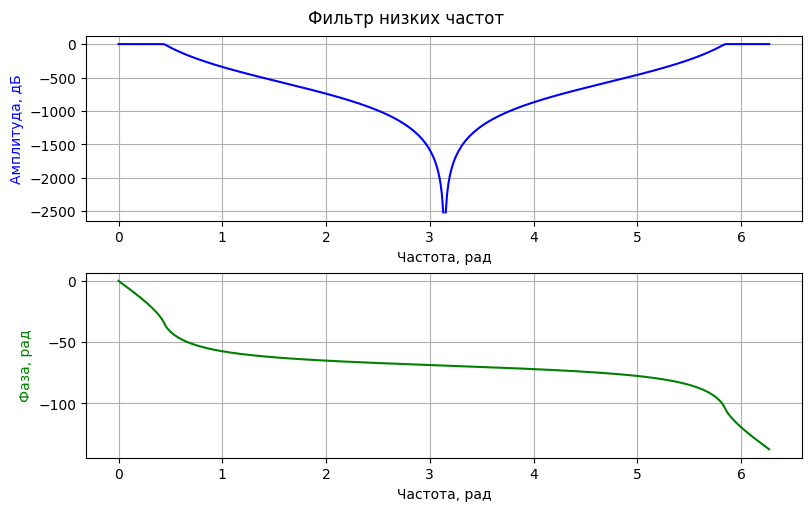

In [29]:
# Нормированная частота среза (Гц)
Fc = 3500/25000

# Нормированная частота задержания (Гц)
Fz = 4000/25000

# Уровень на частоте среза
Qc = 3

# Уровень на частоте задержания
Qz = 50

# Частота дискретизации (Гц)
Fd = 50000

# Расчитаем порядок ЦФ Баттерворта. Для этого воспользуемся функцией buttord:
[n, Fn] = sp.buttord(wp=Fc, ws=Fz, gpass=Qc, gstop=Qz, fs=Fd)
print(f'n = {n}\nWn = {Fn}')

# Синтезируем ЦФ. Для этого воспользуемся функцией butter:
s = sp.butter(n, Fn, btype="lowpass", output='sos')
print(f'len = {len(s)}')

# Для вывода АЧХ и ФЧХ воспользуемся функцией freqz:
# w, h = sp.freqz(b, a, worN=512, fs=Fd)
w, h = sp.sosfreqz(sos=s, worN=512, whole=True)

# Расчет АЧХ по откликам фильтра
fr = FrequencyResponse(h=h)

# Расчет ФЧХ по откликам фильтра
pr = PhaseResponse(h=h)

# Графики АЧХ и ФЧХ
FRPRDiagram(w=w, fr=fr, pr=pr, title='Фильтр низких частот')
# FRPRDiagram(w=w, fr=fr, pr=pr, title='Фильтр низких частот', xvlines=[5000, 10000])

# printfilter(title='Фильтр низких частот', w=w, h=h, xvlines=[5000, 10000])


Нули: [ 0.+0.j  0.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j
 -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j
 -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j
 -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j
 -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j]
Полюса: [0.63472343+0.01066118j 0.63472343-0.01066118j 0.63569039+0.03197785j
 0.63569039-0.03197785j 0.63762821+0.05327724j 0.63762821-0.05327724j
 0.6405447 +0.07454709j 0.6405447 -0.07454709j 0.64445155+0.09577398j
 0.64445155-0.09577398j 0.64936439+0.1169429j  0.64936439-0.1169429j
 0.6553027 +0.13803666j 0.6553027 -0.13803666j 0.66228988+0.15903543j
 0.66228988-0.15903543j 0.67035316+0.17991608j 0.67035316-0.17991608j
 0.67952353+0.20065154j 0.67952353-0.20065154j 0.68983569+0.22121009j
 0.68983569-0.22121009j 0.70132787+0.2415546j  0.70132787-0.2415546j
 0.71404161+0.2616416j  0.71404161-0.2616416j  0.72802144+0.28142039j


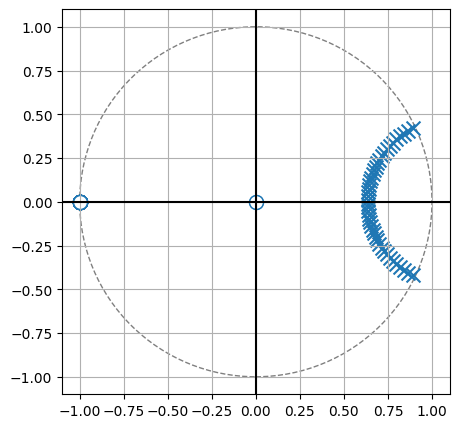

In [24]:
# Возвращаемые значения:
# z - значения нулей фильтра
# p - значения полюсов фильтра
# k - коэффициент усиления фильтра
# Параметры:
# b - коэффициенты прямых связей
# a - коэффициенты обратных связей
z, p, k = sp.sos2zpk(sos=s)

print(f'Нули: {z}')
print(f'Полюса: {p}')
print(f'Коэффициент усиления: {k}')

ZerosPolesDiagram(z=z, p=p)